In [5]:
import  pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from glob import glob   
#help to list out files in a directory 

import os 

import librosa  
import librosa.display 
from itertools import cycle

import IPython.display as ipd #to play audio files 


In [6]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [10]:
audio_files = glob('../data/raw/*/*.wav') #read audio files 

In [11]:
print(f"Total audio files: {len(audio_files)}")

Total audio files: 4


In [12]:
#Play the first audio file 
ipd.Audio(audio_files[0])

y: [ 0.00539617  0.00131947 -0.00671772 ...  0.00357451 -0.00191148
  0.        ]
shape of y: (117603,)
sr: 22050


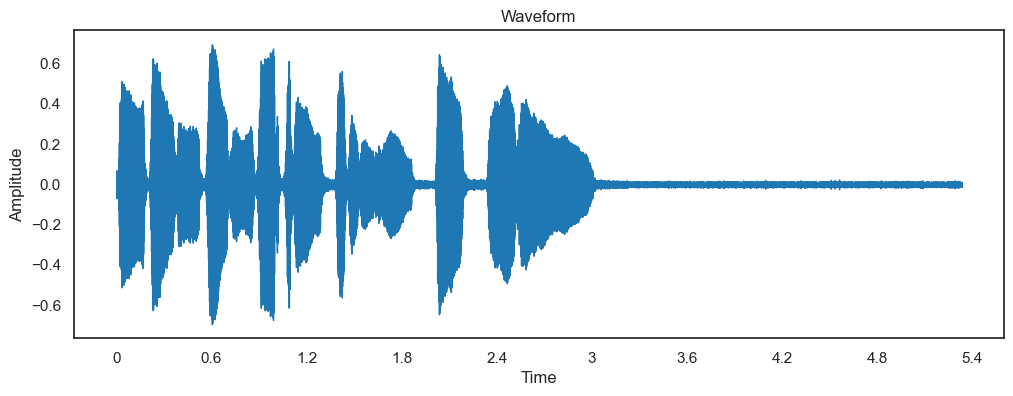

In [ ]:
y,sr = librosa.load(audio_files[0])
print(f"y: {y}")
print(f"shape of y: {y.shape}")
print(f"sr: {sr}")

#plot the waveform using matplotlib
plt.figure(figsize=(12,4))
librosa.display.waveshow(y,sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


<Axes: title={'center': 'Raw Audio - Waveform'}>

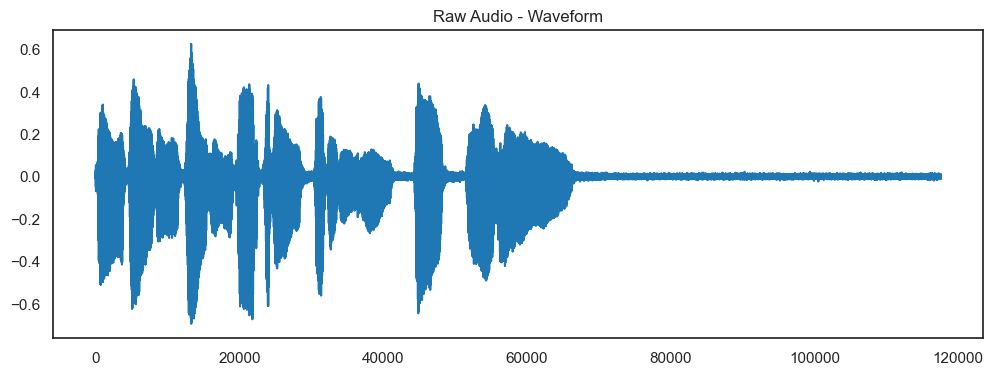

In [ ]:
from matplotlib.pyplot import xlabel


pd.Series(y).plot(figsize=(12,4),xlabel = 'Time',ylabel = 'Frequency',title='Raw Audio - Waveform')

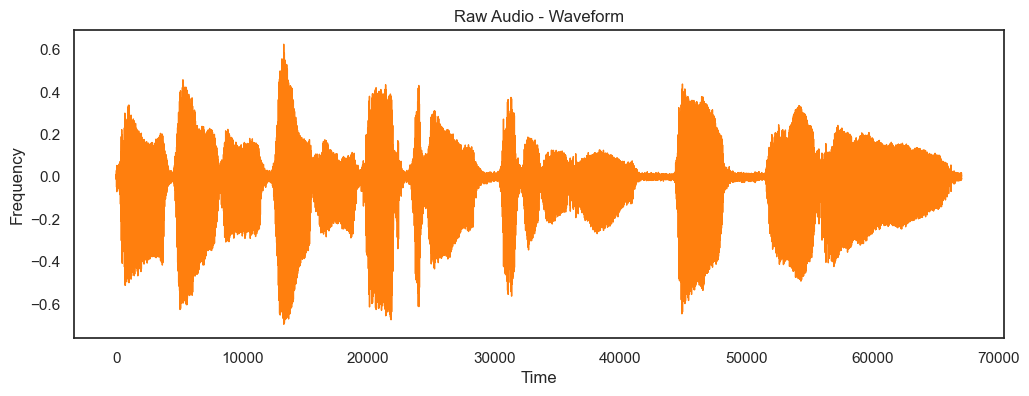

In [29]:
#Remove white space from the audio file 
#top_db is the threshold in decibels below which audio is considered silent ;defalut is 60
y_trimmed, index = librosa.effects.trim(y,top_db=20) 
pd.Series(y_trimmed).plot(figsize=(12,4),
                         lw = 1,
                         xlabel = 'Time',
                         ylabel = 'Frequency',
                         color = color_pal[1],
                         title='Raw Audio - Waveform')
plt.show() # remove  <Axes line>

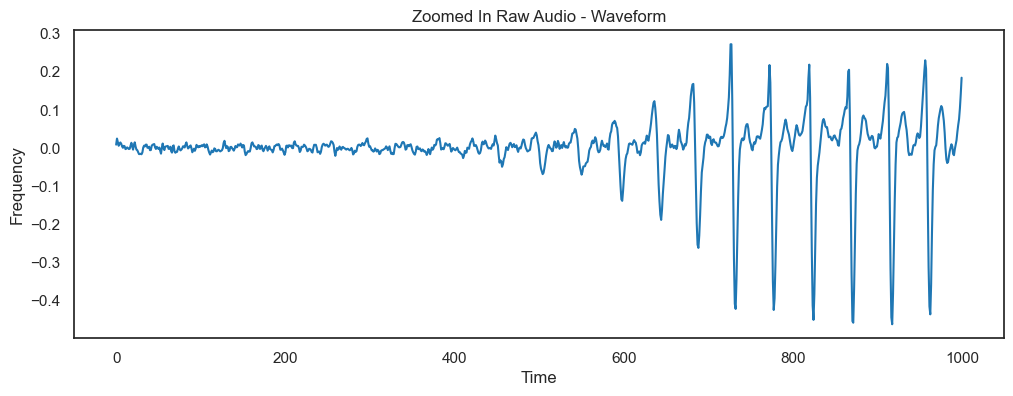

In [ ]:
pd.Series(y[30000 : 31000]).plot(figsize=(12,4),
                                 xlabel = 'Time',
                                 ylabel = 'Frequency',
                                 title='Zoomed In Raw Audio - Waveform')
plt.show()

In [41]:
#Spectrogram - Extracting which frequencies are present in the audio file at any given time  

#Short Time Fourier Transform (STFT)
D = librosa.stft(y_trimmed)

#apply this fourier transform to amplitude to decible transform 
#reference is the maximum amplitude in the audio file 
#abs ~ absolute value
S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
S_db.shape

(1025, 132)

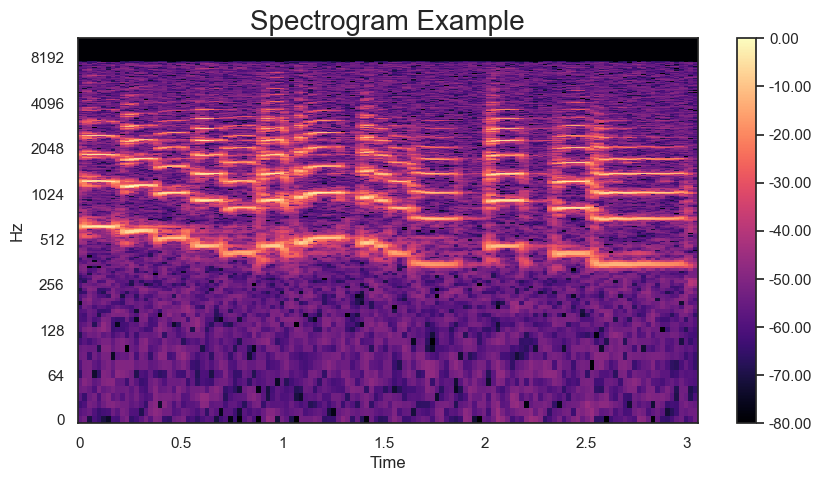

In [44]:
#Plot the transformation audio data
fig,ax = plt.subplots(figsize=(10,5))
#Axes
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax = ax
                                )
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')

In [45]:
#Mel- Spectrogram - we gonne use this transform to express the frequencies that we usually hear (melodic)
S = librosa.feature.melspectrogram(y = y,
                               sr = sr,
                               n_mels = 128,)
S_db_mel = librosa.amplitude_to_db(S,ref=np.max)

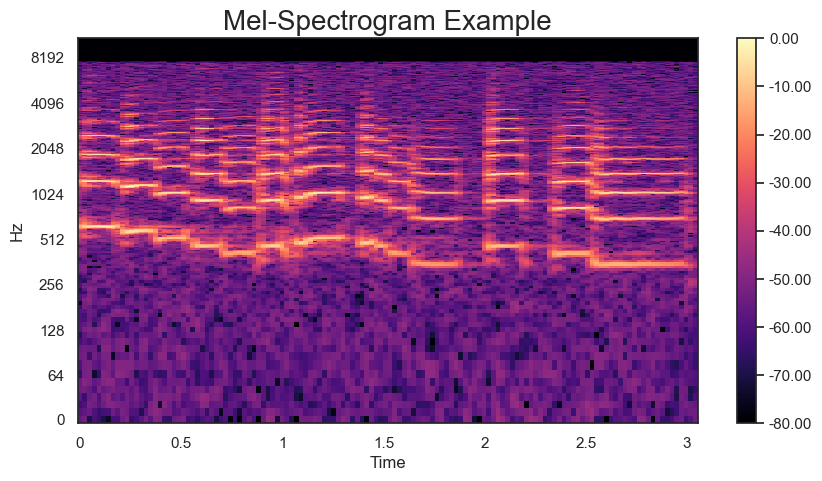

In [46]:
#Plot the transformation audio data
fig,ax = plt.subplots(figsize=(10,5))
#Axes
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax = ax
                                )
ax.set_title('Mel-Spectrogram Example', fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')